<a href="https://colab.research.google.com/github/PrudhviNarayanKorupolu/inclassassignment3/blob/main/In_class_exercise_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The third In-class-exercise (9/29/2021, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
Learning Algorithms.which are used totrain the data. Supervised learning  is a machine learning task that establishes the mathematical relationship
Hyperparameter Optimization are essentially parameters of the machine learning algorithm that directly impacts the learning process and prediction performance
Feature Selection.Feature Selection
As the name implies, feature selection is literally the process of selecting a subset of features from an initially large volume of features. Aside from achieving
highly accurate models, one of the most important aspect of machine learning model building is to obtain actionable insights and in order to achieve that it is important
to be able to select a subset of important features from the vast number.
Classification
A trained classification model takes as input a set of variables either quantitative or qualitative and predicts the output class label (qualitative).
performance metrics which are used to analyse the data using differnt methods to get a brief knowledge about the data.
Descriptive statistics



'''

Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
%matplotlib inline
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.corpus import stopwords
stop = stopwords.words('english')




In [ ]:
#importing dataset
df = pd.read_csv('/content/dataset.csv', encoding="utf8")
print(df.shape)
df.head(5)

(3798, 2)


,Text,sentiment
0,TRENDING: New Yorkers encounter empty supermar...,-1
1,When I couldn't find hand sanitizer at Fred Me...,1
2,Find out how you can protect yourself and love...,1
3,#Panic buying hits #NewYork City as anxious sh...,-1
4,#toiletpaper #dunnypaper #coronavirus #coronav...,0


In [ ]:
#lableing the dataset on average
conditions = [
    (df['sentiment'] == -1), # -1 means negaive result
    (df['sentiment'] == 0), # 0 means neutral result
    (df['sentiment'] == 1), # 1 means possitive result
]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

df['result'] = np.select(conditions, values)

df.head()

,Text,sentiment,result
0,TRENDING: New Yorkers encounter empty supermar...,-1,Negative
1,When I couldn't find hand sanitizer at Fred Me...,1,Positive
2,Find out how you can protect yourself and love...,1,Positive
3,#Panic buying hits #NewYork City as anxious sh...,-1,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,0,Neutral


In [ ]:
df.groupby('result')['Text'].count()

result
Negative    1633
Neutral      619
Positive    1546
Name: Text, dtype: int64

In [ ]:
df.groupby('result')['sentiment'].mean()

result
Negative   -1
Neutral     0
Positive    1
Name: sentiment, dtype: int64

In [ ]:
df['character_cnt'] = df['Text'].str.len()
print(df.groupby('result')['character_cnt'].mean())
print(df.head())

result
Negative    220.601347
Neutral     167.849758
Positive    224.115783
Name: character_cnt, dtype: float64
                                                Text  ...  character_cnt
0  TRENDING: New Yorkers encounter empty supermar...  ...            228
1  When I couldn't find hand sanitizer at Fred Me...  ...            193
2  Find out how you can protect yourself and love...  ...             73
3  #Panic buying hits #NewYork City as anxious sh...  ...            318
4  #toiletpaper #dunnypaper #coronavirus #coronav...  ...            252

[5 rows x 4 columns]


In [ ]:
df['word_counts'] = df['Text'].str.split().str.len()
print(df.groupby('result')['word_counts'].mean())
print(df.head())

result
Negative    34.537048
Neutral     23.920840
Positive    34.789780
Name: word_counts, dtype: float64
                                                Text  ...  word_counts
0  TRENDING: New Yorkers encounter empty supermar...  ...           23
1  When I couldn't find hand sanitizer at Fred Me...  ...           30
2  Find out how you can protect yourself and love...  ...           13
3  #Panic buying hits #NewYork City as anxious sh...  ...           37
4  #toiletpaper #dunnypaper #coronavirus #coronav...  ...           26

[5 rows x 5 columns]


In [ ]:
df['characters_per_word'] = df['character_cnt']/df['word_counts']
print(df.groupby('result')['characters_per_word'].mean())
print(df.head())

result
Negative    6.569548
Neutral     7.395562
Positive    6.623893
Name: characters_per_word, dtype: float64
                                                Text  ...  characters_per_word
0  TRENDING: New Yorkers encounter empty supermar...  ...             9.913043
1  When I couldn't find hand sanitizer at Fred Me...  ...             6.433333
2  Find out how you can protect yourself and love...  ...             5.615385
3  #Panic buying hits #NewYork City as anxious sh...  ...             8.594595
4  #toiletpaper #dunnypaper #coronavirus #coronav...  ...             9.692308

[5 rows x 7 columns]


In [ ]:
df['special_characters'] = df['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df[['Text','special_characters']].head()


,Text,special_characters
0,TRENDING: New Yorkers encounter empty supermar...,0
1,When I couldn't find hand sanitizer at Fred Me...,0
2,Find out how you can protect yourself and love...,0
3,#Panic buying hits #NewYork City as anxious sh...,0
4,#toiletpaper #dunnypaper #coronavirus #coronav...,0


In [ ]:
df['num'] = df['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
print(df.groupby('result')['num'].mean())
print(df.head())

result
Negative    0.196571
Neutral     0.190630
Positive    0.176585
Name: num, dtype: float64
                                                Text  ...  num
0  TRENDING: New Yorkers encounter empty supermar...  ...    0
1  When I couldn't find hand sanitizer at Fred Me...  ...    1
2  Find out how you can protect yourself and love...  ...    0
3  #Panic buying hits #NewYork City as anxious sh...  ...    0
4  #toiletpaper #dunnypaper #coronavirus #coronav...  ...    0

[5 rows x 9 columns]


In [ ]:

df['processedtext'] = df['Text'].str.replace('[^\w\s]','',regex=True) 
df['processedtext'] = df['processedtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['processedtext'] = df['processedtext'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Lines 4 to 6
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['processedtext'] = df['processedtext'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

df[['character_cnt','word_counts','characters_per_word', 'special_characters', 'num', 'processedtext']].head()
df = df[['Text', 'sentiment','character_cnt','word_counts','characters_per_word','special_characters','num','result']]
df.to_csv('processed.csv', index=False)
df

,Text,sentiment,character_cnt,word_counts,characters_per_word,special_characters,num,result
0,TRENDING: New Yorkers encounter empty supermar...,-1,228,23,9.913043,0,0,Negative
1,When I couldn't find hand sanitizer at Fred Me...,1,193,30,6.433333,0,1,Positive
2,Find out how you can protect yourself and love...,1,73,13,5.615385,0,0,Positive
3,#Panic buying hits #NewYork City as anxious sh...,-1,318,37,8.594595,0,0,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,0,252,26,9.692308,0,0,Neutral
...,...,...,...,...,...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,1,127,18,7.055556,0,0,Positive
3794,Did you panic buy a lot of non-perishable item...,-1,213,34,6.264706,0,0,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,0,185,26,7.115385,2,0,Neutral
3796,Gov need to do somethings instead of biar je r...,-1,174,29,6.000000,0,0,Negative


Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [ ]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['Text'] = label_encoder.fit_transform(df['Text'])
df['result'] = label_encoder.fit_transform(df['result'])
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
df.head()

,Text,sentiment,character_cnt,word_counts,characters_per_word,special_characters,num,result
0,2906,0,228,23,9.913043,0,0,0
1,3463,2,193,30,6.433333,0,1,2
2,1252,2,73,13,5.615385,0,0,2
3,152,0,318,37,8.594595,0,0,0
4,208,1,252,26,9.692308,0,0,1


In [ ]:
from sklearn.feature_selection import chi2


X = df.drop('result',axis=1)
y = df['result']

scores = chi2(X,y)

In [ ]:
scores

(array([2.06589950e+03, 3.25148828e+03, 7.24588966e+03, 1.81722211e+03,
        4.95955944e+01, 3.46621725e+00, 1.73158728e+00]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.70001801e-11, 1.76734155e-01, 4.20717522e-01]))

In [ ]:
p_values = pd.Series(scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

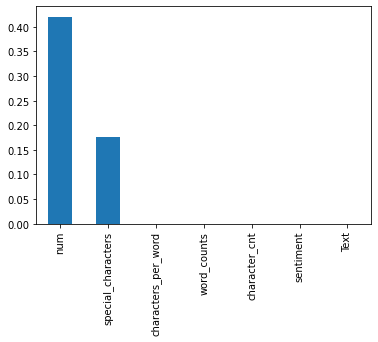

In [ ]:
p_values.plot.bar()